# Construct and analyze a stock correlation network

In [1]:
import copy
import numpy as np
import pandas as pd
from scipy import stats
from tqdm.notebook import tqdm
import yfinance as yf
import networkx as nx  # https://networkx.org/documentation/stable/tutorial.html
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import bs4 as bs
import pickle
import requests


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        ticker = ticker.replace('\n', '')
        tickers.append(ticker)

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    return tickers

In [3]:
tickers = save_sp500_tickers()

In [4]:
ticker_data = pd.read_pickle("./sp500tickers.pickle")

In [5]:
ticker_data_reduced = ticker_data[:1000]
ticker_data_reduced_text = ' '.join(ticker_data_reduced)

In [6]:
ticker_data = yf.download(ticker_data_reduced_text,
                          start='2022-04-30',
                          end='2023-04-30',
                          group_by="ticker")
ticker_data.head()

[*********************100%***********************]  503 of 503 completed


2 Failed downloads:
['BF.B']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2022-04-30 -> 2023-04-30)')
['BRK.B']: Exception('%ticker%: No timezone found, symbol may be delisted')


COST                                       
                           Open        High         Low       Close   
Date                                                                  
2022-05-02 00:00:00  532.229980  539.200012  518.270020  528.950012  \
2022-05-03 00:00:00  530.000000  534.270020  523.700012  528.080017   
2022-05-04 00:00:00  531.599976  546.140015  522.809998  544.429993   
2022-05-05 00:00:00  541.570007  542.340027  512.169983  517.320007   
2022-05-06 00:00:00  514.400024  516.440002  498.820007  503.359985   

                                                  O                         
                      Adj Close   Volume       Open       High        Low   
Date                                                                        
2022-05-02 00:00:00  525.075928  3303400  69.580002  69.870003  66.110001  \
2022-05-03 00:00:00  524.212341  2398000  67.730003  68.660004  67.110001   
2022-05-04 00:00:00  540.442505  2465200  67.540001  68.889999  67.010002   
2022-05-05 00:00:00  513.531067  3977000  69.059998  69.370003  66.650002   
2022-05-06 00:00:00  499.673340  3560800  66.519997  66.860001  65.370003   

                                ...       CDAY                                  
                         Close  ...        Low      Close  Adj Close   Volume   
Date                            ...                                             
2022-05-02 00:00:00  67.379997  ...  55.555000  57.330002  57.330002  1403400  \
2022-05-03 00:00:00  67.669998  ...  56.650002  57.160000  57.160000  1521000   
2022-05-04 00:00:00  68.580002  ...  55.220001  61.240002  61.240002  2837400   
2022-05-05 00:00:00  67.099998  ...  54.759998  56.470001  56.470001  5187100   
2022-05-06 00:00:00  66.120003  ...  52.790001  54.889999  54.889999  2462900   

                            ALL                                       
                           Open        High         Low       Close   
Date                                                                  
2022-05-02 00:00:00  127.389999  129.410004  125.430000  127.730003  \
2022-05-03 00:00:00  128.660004  132.059998  128.330002  129.779999   
2022-05-04 00:00:00  129.750000  133.899994  128.690002  133.679993   
2022-05-05 00:00:00  131.309998  133.089996  129.610001  131.580002   
2022-05-06 00:00:00  131.259995  132.000000  129.460007  130.559998   

                                          
                      Adj Close   Volume  
Date                                      
2022-05-02 00:00:00  123.379257  1587800  
2022-05-03 00:00:00  125.359421  1662300  
2022-05-04 00:00:00  129.126572  1688600  
2022-05-05 00:00:00  127.098122  2465100  
2022-05-06 00:00:00  126.112869  1851900  

[5 rows x 3018 columns]

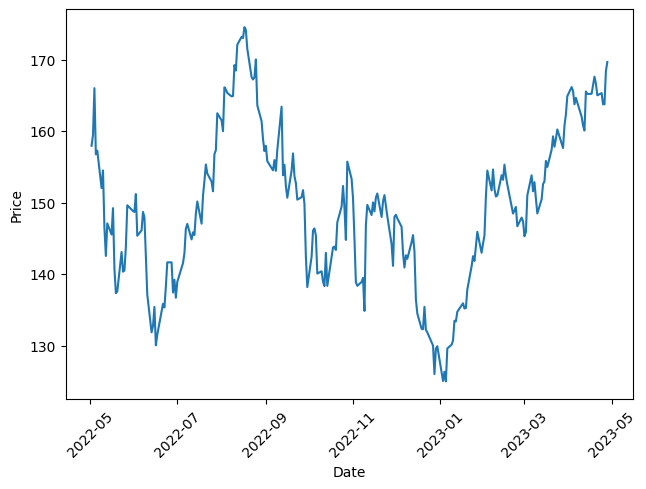

In [7]:
tkr = 'AAPL'
tkrd = ticker_data[tkr]
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(tkrd.index, tkrd['Close'])
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

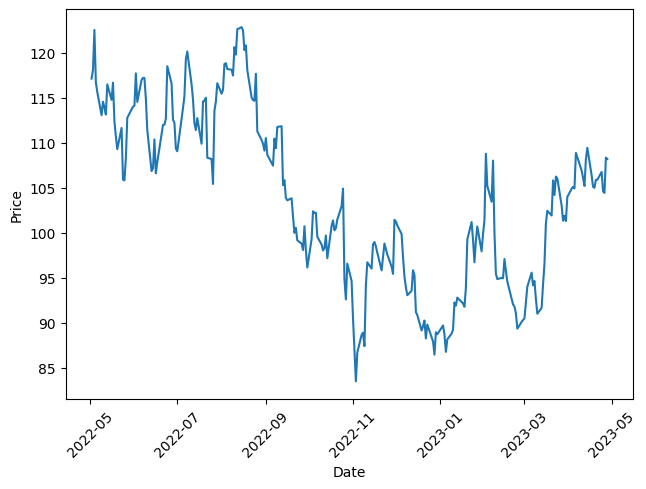

In [8]:
tkr = 'GOOG'
tkrd = ticker_data[tkr]
fig, ax = plt.subplots()
plt.xticks(rotation=45)
ax.plot(tkrd.index, tkrd['Close'])
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Assignment: print the time series of the Open price of the Amazon ticker

In [26]:
# Get the set of all the ticker names
# ticket_set = set()
# for t in ticker_data.columns:
#     ticket_set.add(t[0])
#     if t[0][0] != 'A':
#         continue
#     ticket_set.add(t[0])

# ticket_set

# Get a list of all ticker names, filter the ones starting with a in another list and then, find amazon one
# HINT: USE A COMPREHENSIVE LIST (OTHER APPROACH)
ticker_names_set = set()
for t in ticker_data.columns:
    if t[0][0] != 'A':
        continue
    ticker_names_set.add(t[0])

amazon_ticker = None

for t in ticker_names_set:
    if t[0] == 'A' and t[1] == 'M' and t[2] == 'Z':
        print(t)
        amazon_ticker = t

AMZN


IndexError: string index out of range

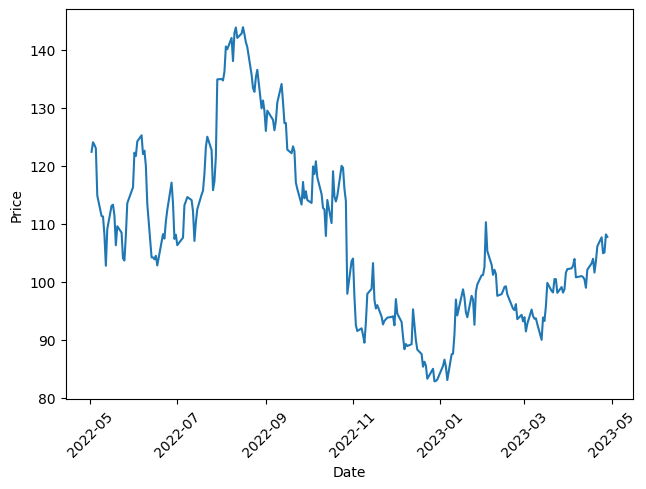

In [28]:
# tkr = '# Add the Amazon ticker name here'
tkr = amazon_ticker
tkrd = ticker_data[tkr]
fig, ax = plt.subplots()
plt.xticks(rotation=45)
# ax.plot(tkrd.index, tkrd[???]) # Edit the column name
ax.plot(tkrd.index, tkrd['Open'])
plt.tight_layout()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Calculate the correlations

In [29]:
tickers_reduced = tickers[:20]
tickers_reduced = np.random.choice(tickers, 50, replace=False)
tickers_seen = [t for t in tickers_reduced]
sources = []
targets = []
corrs = []
pvals = []
with tqdm(total=len(tickers_reduced)) as pbar:
    for tkr1 in tickers_reduced:
        # Avoid double counting
        tickers_seen.remove(tkr1)
        for tkr2 in tickers_seen:
            d1 = ticker_data[tkr1]['Close']
            d2 = ticker_data[tkr2]['Close']
            if np.any(d1.isna()) or np.any(d2.isna()):
                continue
            # corr, pval = # Assignment: add the correct correlation function here
            corr, pval = stats.kendalltau(d1, d2)
            sources.append(tkr1)
            targets.append(tkr2)
            corrs.append(corr)
            pvals.append(pval)
        pbar.update(1)
corrs_df = pd.DataFrame({"Source": sources,
                         "Target": targets,
                         "Correlation": corrs,
                         "p-value": pvals})
corrs_df.to_pickle("./ticker_correlations_kendall.pkl")

  0%|          | 0/50 [00:00<?, ?it/s]

In [30]:
corrs_df

,Source,Target,Correlation,p-value
0,AVGO,FMC,0.346365,3.471756e-16
1,AVGO,WST,0.392398,2.430160e-20
2,AVGO,CLX,0.509713,3.437389e-33
3,AVGO,DPZ,-0.214314,4.484185e-07
4,AVGO,TRMB,-0.156301,2.327068e-04
...,...,...,...,...
1220,HBAN,DXC,0.214188,4.735881e-07
1221,HBAN,SYY,0.088729,3.688650e-02
1222,LH,DXC,0.345844,3.932715e-16
1223,LH,SYY,0.353083,9.323134e-17


# Assignment: construct and show a small network from an adjacency matrix

In [53]:
def from_numpy_matrix(matrix, labels, graph):
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 1:
                graph.add_edge(labels[i], labels[j])
    return graph

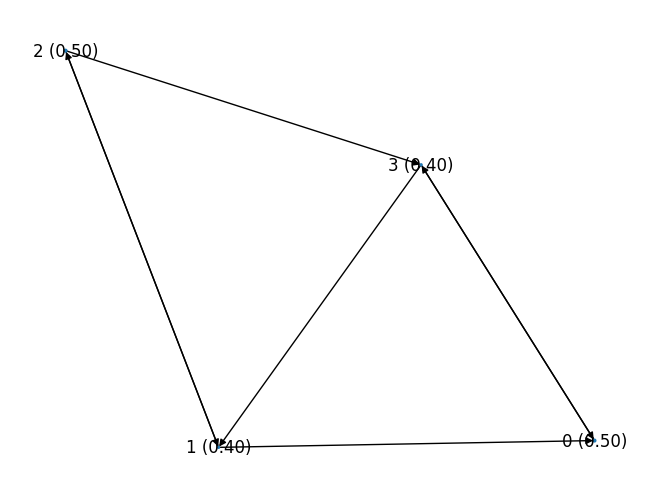

In [54]:
import networkx as nx  # https://networkx.org/documentation/stable/tutorial.html
import matplotlib.pyplot as plt
import numpy as np

# Define the adjacency matrix as a NumPy ndarray
adjacency_matrix = np.array([[0, 0, 0, 1],
                             [1, 0, 1, 0],
                             [0, 1, 0, 1],
                             [1, 1, 0, 0]])
labels = {0: 'a1', 1: 'a2', 2: 'a3', 3: 'a4'}

# Create a directed graph from the adjacency matrix
# G = from_numpy_matrix(adjacency_matrix, labels, nx.DiGraph())  # USING OWN FUNCTION
G = nx.from_numpy_array(adjacency_matrix, create_using=nx.DiGraph())  # USING NETWORKX FUNCTION

# Calculate the clustering coefficient of each node
clustering_coefficients = nx.clustering(G)

# Set the node labels
node_labels = {node: f"{node} ({clustering_coefficients[node]:.2f})"
               for node in G.nodes}

# Set the node sizes proportional to the clustering coefficient
# node_sizes = [clustering_coefficients[node] * 1000 for node in G.nodes]
node_sizes = [(30 * clustering_coefficients[node] ** 3)
              for node in G.nodes()]

# Draw the graph with node sizes and labels
nx.draw(G, with_labels=True, labels=node_labels, node_size=node_sizes)

# The line below makes sure your result is displayed in the notebook
plt.show()

# Build the network

In [55]:
# Let's build an undirected graph
G = nx.Graph()

for source, target, corr, p in corrs_df.itertuples(index=False):
    G.add_node(source)
    G.add_node(target)
    if corr > 0.6 and p < 0.05:
        G.add_edge(source, target)

In [56]:
# See how many nodes we have in the network
# list(G.nodes) # <--- lists the node ids
G.number_of_nodes()

50

In [59]:
# Let's compare to the number of tickers in our DataFrame
print(f"Number of sources: {len(corrs_df['Source'].unique())}")
corrs_df['Source'].unique()

Number of sources: 49


array(['AVGO', 'FMC', 'WST', 'CLX', 'DPZ', 'TRMB', 'DOV', 'DLTR', 'PM',
       'EMN', 'AVY', 'WRK', 'WBD', 'VZ', 'TEL', 'ABT', 'GS', 'SPGI', 'V',
       'ABC', 'CTAS', 'PCAR', 'CMS', 'CNP', 'SEE', 'INCY', 'LNT', 'MLM',
       'SBAC', 'ISRG', 'ADBE', 'K', 'KMI', 'IP', 'PARA', 'KMB', 'MCD',
       'WAB', 'QRVO', 'LMT', 'CCI', 'BDX', 'XEL', 'VICI', 'COP', 'DXCM',
       'HBAN', 'LH', 'DXC'], dtype=object)

In [ ]:
# Why isn't it the same number as the number of nodes?
# TODO

# Visualize the network

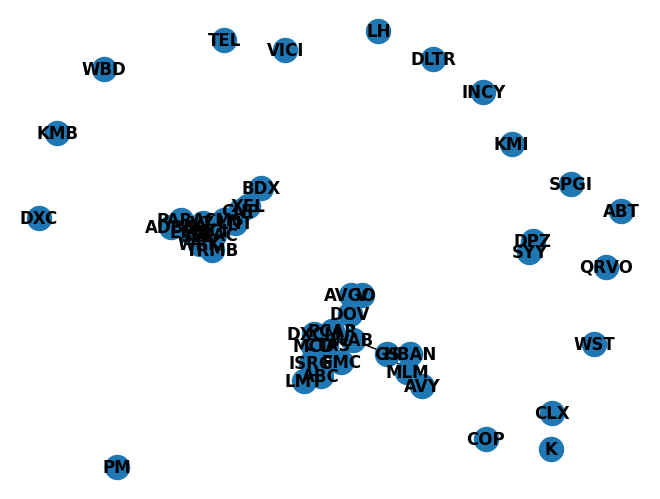

In [60]:
nx.draw(G, with_labels=True, font_weight='bold')

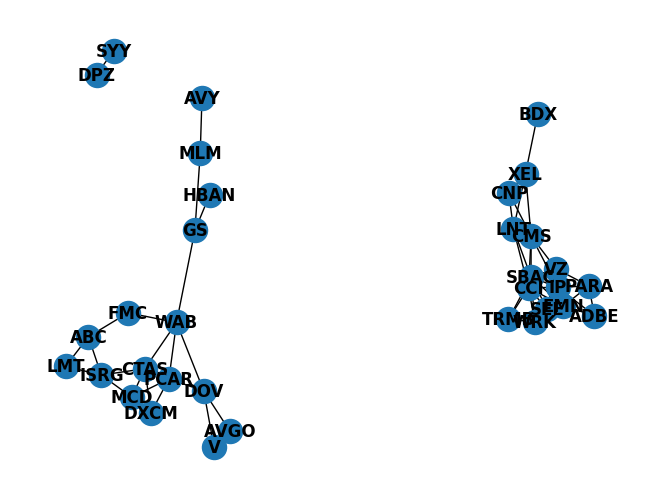

In [61]:
# Remove disconnected nodes
G_copy = G.copy()
for n in G_copy.nodes:
    if len(list(nx.neighbors(G, n))) == 0:
        G.remove_node(n)

nx.draw(G, with_labels=True, font_weight='bold')

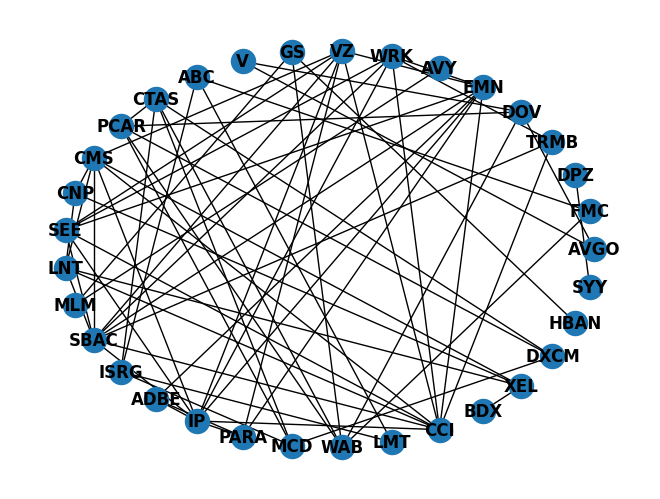

In [62]:
nx.draw_circular(G, with_labels=True, font_weight='bold')

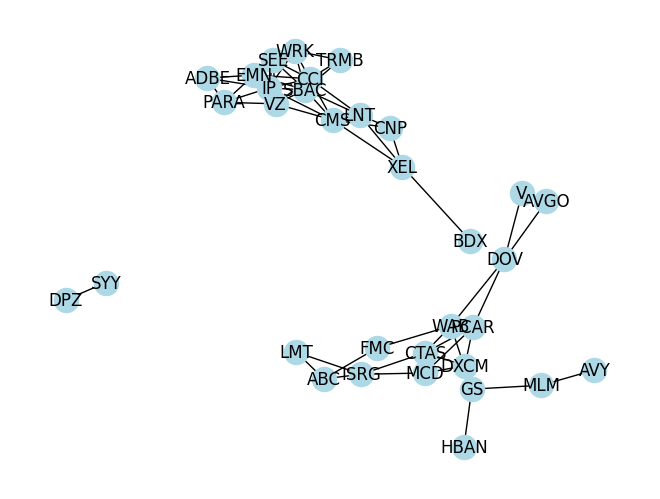

In [63]:
# Let's draw a slightly nicer visualization
pos = nx.spring_layout(G, scale=30, k=2 / np.sqrt(G.order()))
nx.draw(G, pos, node_color='lightblue',
        with_labels=True)

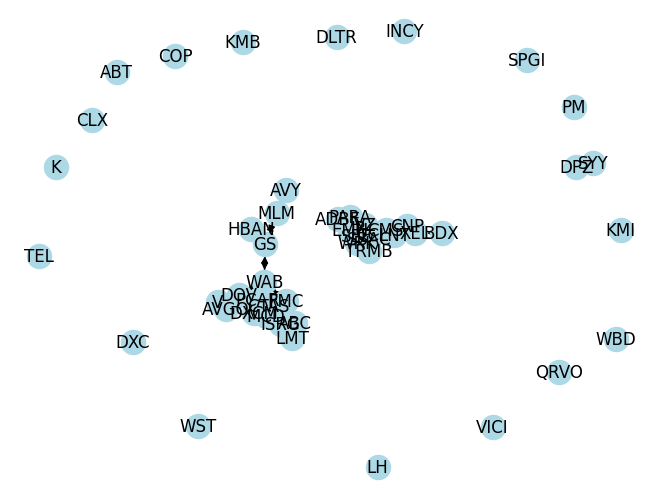

In [64]:
# Let's build and vizualize a directed graph
dG = G.to_directed()

for source, target, corr, p in corrs_df.itertuples(index=False):
    dG.add_node(source)
    dG.add_node(target)
    if corr > 0.6 and p < 0.05:
        dG.add_edge(source, target)

nx.draw(dG, node_color='lightblue', with_labels=True)

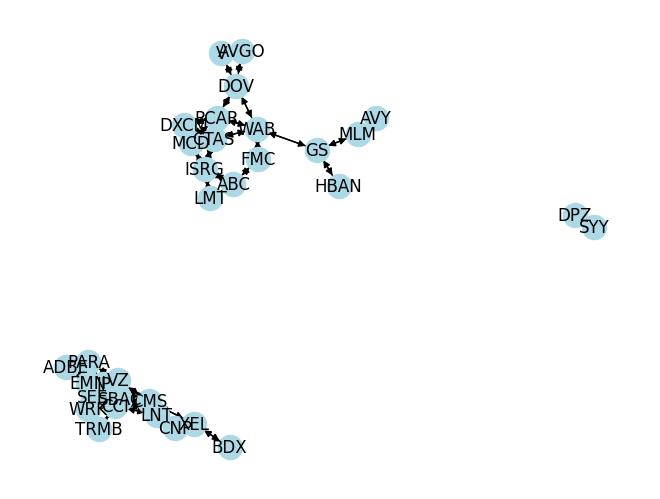

In [65]:
# Remove disconnected nodes
dG_copy = dG.copy()
for n in dG_copy.nodes:
    if len(list(nx.neighbors(dG, n))) == 0:
        dG.remove_node(n)

nx.draw(dG, node_color='lightblue', with_labels=True)

# Stochastic graphs

100
100
184


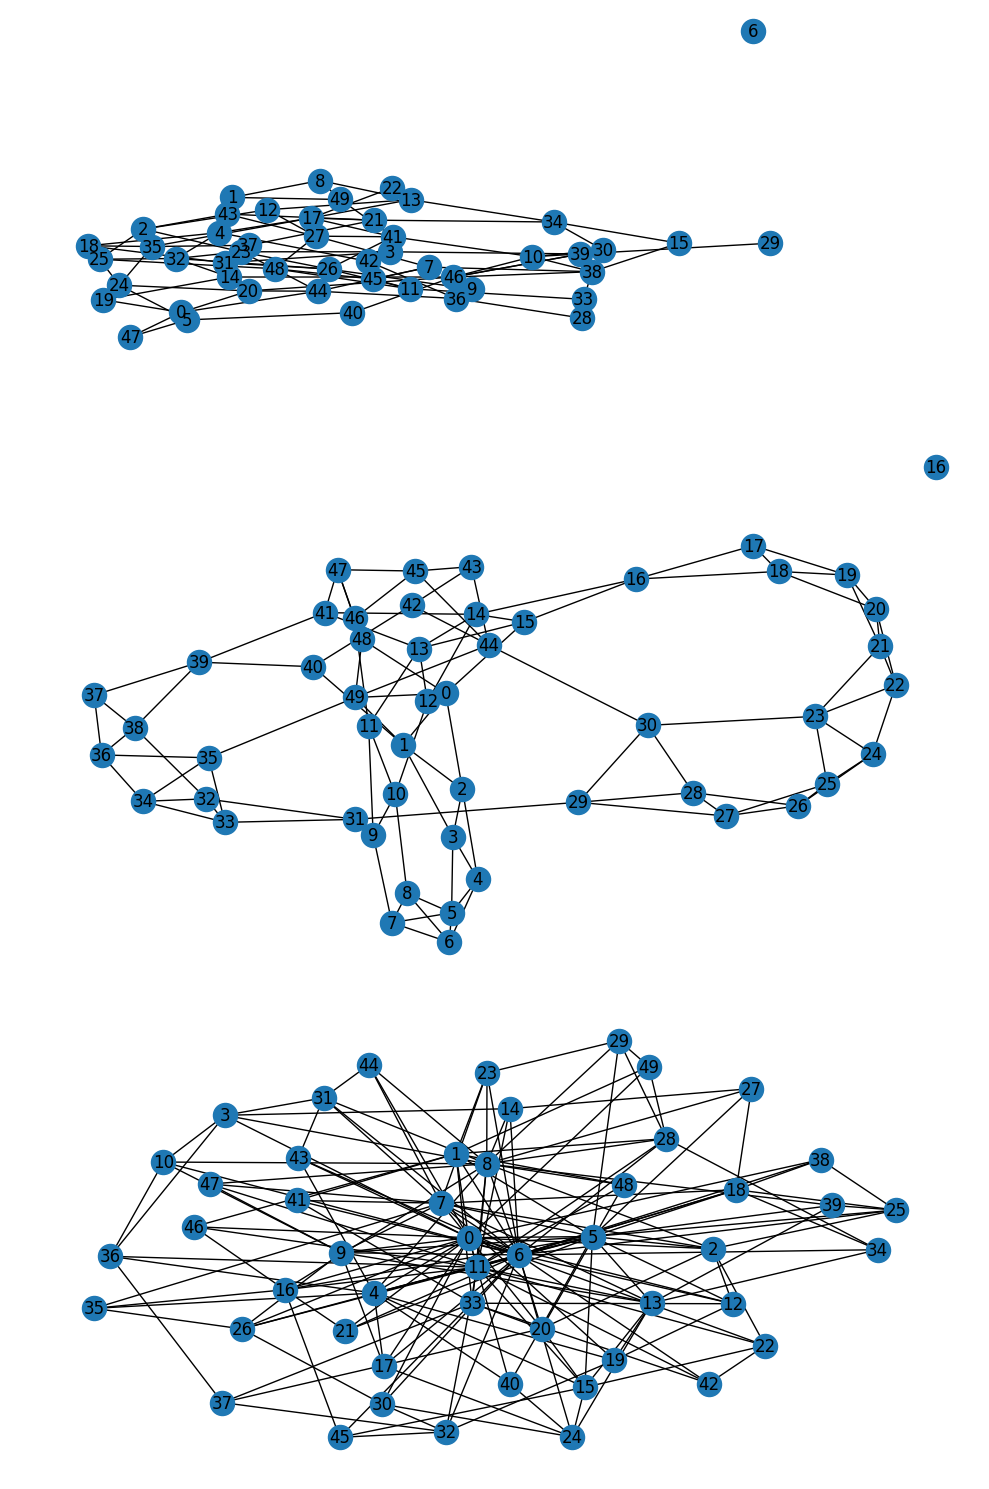

In [66]:
import networkx as nx
import matplotlib.pyplot as plt

num_nodes = 50
num_edges = 100  # The number of edges to be maintained across all graphs
SEED = 95

# Create an Erdos-Renyi graph with 50 nodes and 100 edges
er = nx.erdos_renyi_graph(num_nodes, num_edges / (num_nodes * (num_nodes - 1) / 2), seed=SEED)
er = nx.gnm_random_graph(num_nodes, num_edges)

# Create a Watts-Strogatz graph with 50 nodes, each node connected to its 4 nearest neighbors,
# and rewiring probability of 0.1
ws = nx.watts_strogatz_graph(num_nodes, 4, 0.1, seed=SEED)

# Create a Barabasi-Albert graph with 50 nodes and each new node connecting to 4 existing nodes
ba = nx.barabasi_albert_graph(num_nodes, 4, seed=SEED)

# Verify that all three graphs have the same number of edges
print(er.number_of_edges())
print(ws.number_of_edges())
print(ba.number_of_edges())

fig = plt.figure(1, figsize=(10, 15))

# Draw the Erdos-Renyi graph
plt.subplot(311)
nx.draw(er, with_labels=True)

# Draw the Watts-Strogatz graph
plt.subplot(312)
nx.draw(ws, with_labels=True)

# Draw the Barabasi-Albert graph
plt.subplot(313)
nx.draw(ba, with_labels=True)

# Display the graphs
plt.tight_layout()
plt.show()

In [67]:
er = nx.erdos_renyi_graph(50, 0.15)

ws = nx.watts_strogatz_graph(50, 5, 0.5)

ba = nx.barabasi_albert_graph(50, 5)

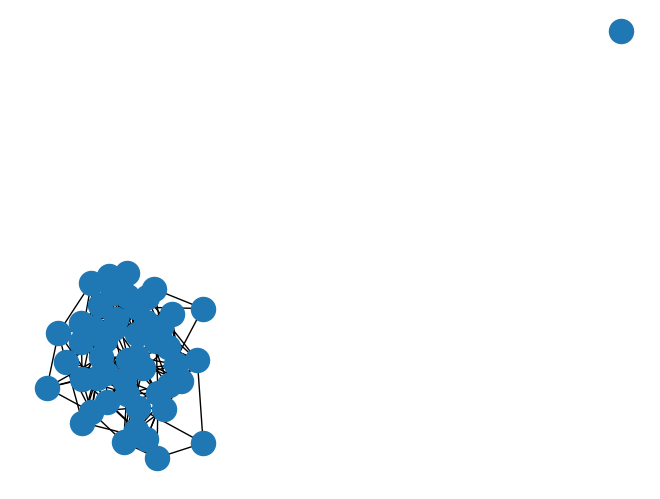

In [68]:
nx.draw(er)

# Telling a story through visualization

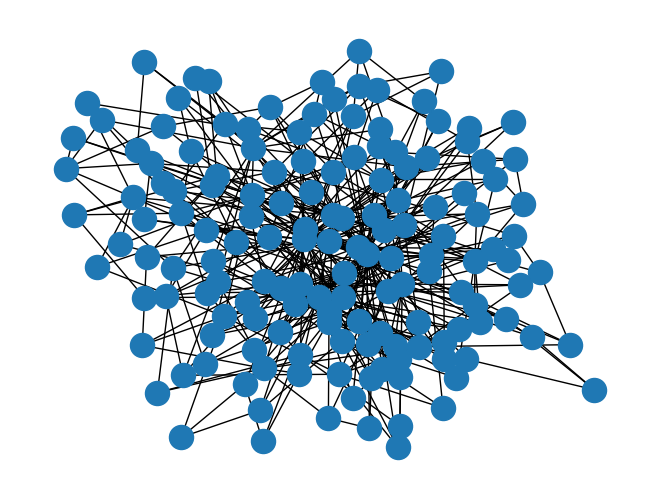

In [69]:
ba = nx.barabasi_albert_graph(150, 3)
nx.draw(ba)

In [70]:
# Get the dictionary of the eigenvector centralities of ba, using a function from the networkx library
# centrality_dict = ...
centrality_dict = nx.eigenvector_centrality(ba)
# TODO Sort with key lambda in comprehensive list

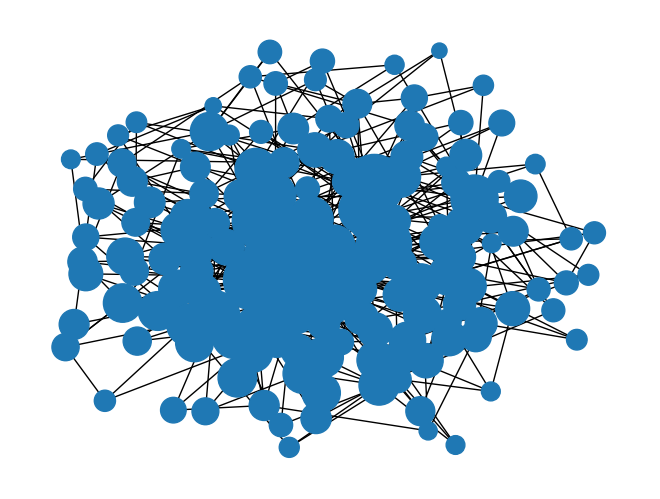

In [72]:
# set node sizes proportional to their closeness centrality
# node_sizes = ...
node_sizes = [centrality_dict[node] * 10000 for node in ba.nodes()]

# draw the graph with node sizes proportional to their closeness centrality
# nx.draw(...)
nx.draw(ba, node_size=node_sizes)

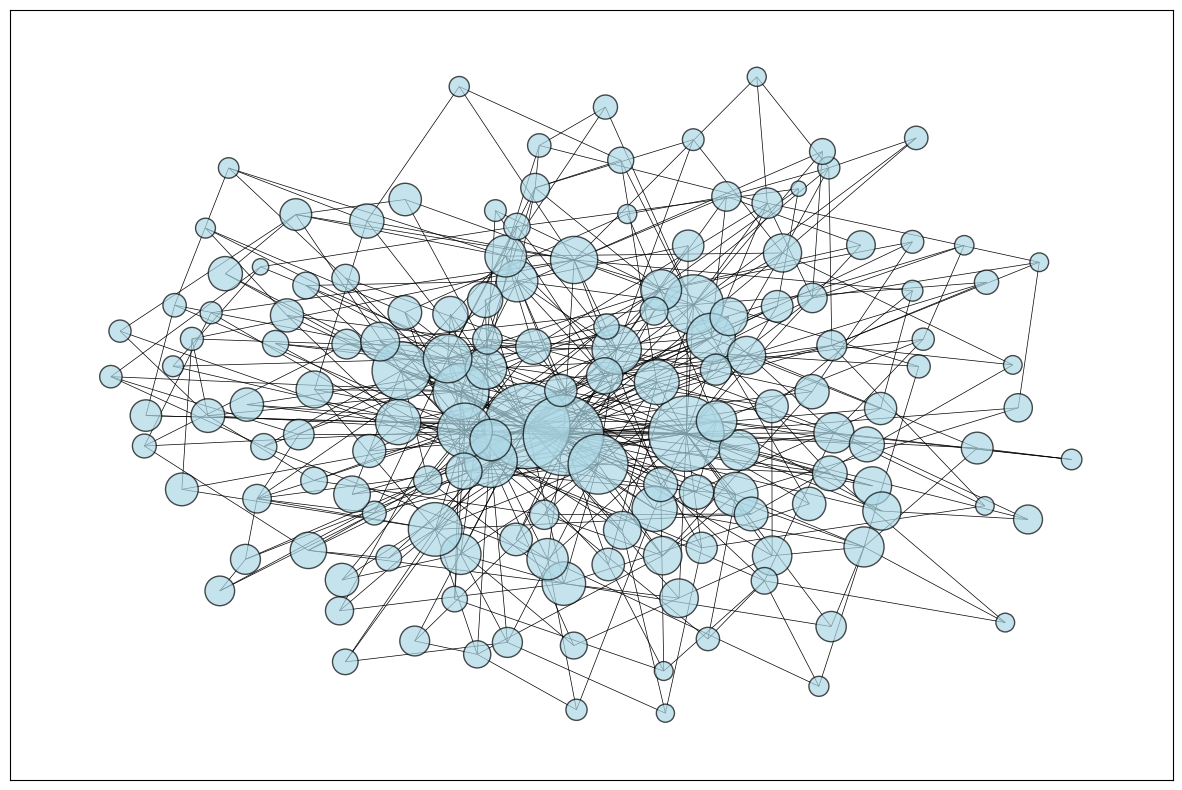

In [74]:
# Let's draw a prettier version of it
# For that, we need to define the layout options for nodes and graphs separately

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(ba, scale=40, k=1 / np.sqrt(ba.order()))

# Third, define the node layout options
# nx.draw_networkx_nodes(???, ???, node_size=???, node_color='lightblue',
# linewidths=1, edgecolors='black', alpha=0.7)
nx.draw_networkx_nodes(ba, pos, node_size=node_sizes, node_color='lightblue',
                       linewidths=1, edgecolors='black', alpha=0.7)

# Fourth, define the edge layout options
# nx.draw_networkx_edges(???, ???, width=0.5)
nx.draw_networkx_edges(ba, pos, width=0.5)

In [77]:
# Let's make the node colors informative
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues')  # create a colormap that ranges from dark blue to light blue

# get the degree of each node
# degrees = ...
degrees = nx.degree(ba)

# set the color of each node proportional to its degree
node_colors = [cmap(colors.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))(degrees[i])) for i in
               range(ba.number_of_nodes())]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
# pos = ...
pos = nx.spring_layout(ba, scale=40, k=1 / np.sqrt(ba.order()))

# Third, define the node layout options
# nx.draw_networkx_nodes(???, ???, node_size=???, ???,
# linewidths=1, edgecolors='black', alpha=0.7)
nx.draw_networkx_nodes(ba, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.7)

# Fourth, define the edge widths proportionately to the degree
edge_widths = ...

# Finally, draw the network
# nx.draw_networkx_edges(???, ???, width=???, alpha=0.8)
nx.draw_networkx_edges(ba, pos, width=edge_widths, alpha=0.8)

/var/folders/wj/tvdm7qp11rlf5k20r5kb0qg80000gq/T/ipykernel_2683/3890451896.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')  # create a colormap that ranges from dark blue to light blue


AttributeError: 'DegreeView' object has no attribute 'values'

In [78]:
# Let's make the node colors informative
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues')  # create a colormap that ranges from dark blue to light blue

# get the degree of each node
# degrees = ...
degrees = nx.degree(ba)

# set the color of each node proportional to its degree
node_colors = [cmap(colors.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))(degrees[i])) for i in
               range(ba.number_of_nodes())]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
# pos = ...
pos = nx.spring_layout(ba, scale=40, k=1 / np.sqrt(ba.order()))

# Third, define the node layout options
# nx.draw_networkx_nodes(???, ???, node_size=???, node_color=???,
# linewidths=1, edgecolors='black', alpha=0.7)
nx.draw_networkx_nodes(ba, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.7)

# Fourth, get the betweenness centralities
# b_centrality = ...
b_centrality = nx.betweenness_centrality(ba)

# Fiftth, set the width of each edge proportional to the average betweenness centrality of two nodes
edge_widths = [4 * (b_centrality[u] + b_centrality[v]) for u, v in ba.edges()]

# Finally, draw the network
nx.draw_networkx_edges(ba, pos, width=edge_widths, alpha=0.8)

/var/folders/wj/tvdm7qp11rlf5k20r5kb0qg80000gq/T/ipykernel_2683/395854534.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Blues')  # create a colormap that ranges from dark blue to light blue


AttributeError: 'DegreeView' object has no attribute 'values'

In [ ]:
# For reference, this is our original graph.
# Having a better visualization, helps tell a better story (and gain attention)
nx.draw(ba)

In [ ]:
# Let's look at the same visualization but with a Directed Erdos-Renyi graph
er = nx.erdos_renyi_graph(50, 0.15, directed=True)
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues')  # create a colormap that ranges from dark blue to light blue

# get the degree of each node
degrees = dict(er.degree())

# set the color of each node proportional to its degree
node_colors = [cmap(colors.Normalize(vmin=min(degrees.values()), vmax=max(degrees.values()))(degrees[i])) for i in
               range(er.number_of_nodes())]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(er, scale=40, k=1 / np.sqrt(er.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(er, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.7)

# calculate the clustering coefficient of each node
b_centrality = nx.betweenness_centrality(er)
# set the width of each edge proportional to the average betweenness centrality of two nodes
edge_widths = [10 * (b_centrality[u] + b_centrality[v]) for u, v in er.edges()]
# Fourth, define the edge layout options
nx.draw_networkx_edges(er, pos, width=edge_widths, alpha=0.8)

In [ ]:
# Let's investigate the HITS centrality of our Directed Erdos-Renyi graph
# For this, we need to prepare the colors and the colormap
import matplotlib.colors as colors

cmap = plt.cm.get_cmap('Blues')  # create a colormap that ranges from dark blue to light blue

# get the degree of each node
h, a = nx.hits(er)

# set node sizes proportional to their AUTHORITY
node_sizes = [100 * i * 1e3 * i * 1e3 * i for i in a.values()]

# set the color of each node proportional to its HUB metric
node_colors = [cmap(colors.Normalize(vmin=min(h.values()), vmax=max(h.values()))(v)) for v in h.values()]

# First, define the figure size
fig = plt.figure(1, figsize=(15, 10))

# Second, define the node positions
pos = nx.spring_layout(er, scale=40, k=1 / np.sqrt(er.order()))

# Third, define the node layout options
nx.draw_networkx_nodes(er, pos, node_size=node_sizes, node_color=node_colors,
                       linewidths=1, edgecolors='black', alpha=0.95)

# calculate the clustering coefficient of each node
b_centrality = nx.betweenness_centrality(er)
# set the width of each edge proportional to the average betweenness centrality of two nodes
edge_widths = [10 * (b_centrality[u] + b_centrality[v]) for u, v in er.edges()]
# Fourth, define the edge layout options
nx.draw_networkx_edges(er, pos, width=edge_widths, alpha=0.8)